#### QUESTION 1: Factors that impact salary 
To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).
You have learned a variety of new skills and models that may be useful for this problem:
NLP Unsupervised learning and dimensionality reduction techniques (PCA, clustering) Ensemble methods and decision tree models SVM models Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key. Note that most listings DO NOT come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

In [1]:
import pandas as pd
import numpy as np


## EDA/Data Cleaning

### Eliminating duplicate job posting

In [2]:
df=pd.read_csv("./analyst_scientist.csv")
print("Before:{}".format(df.shape))
df=df.drop_duplicates(subset='job_id',keep="last")
df.reset_index(drop=True,inplace=True)
print("After:{}".format(df.shape))

Before:(2088, 15)
After:(1432, 15)


Total unique 1432 jobs were crawled from indeed.com website. 

In [3]:
df.head(3)

,Unnamed: 0,job_id,job_title,job_company,location,salaries,job_type,summary,job_link,job_desc,skill,programming,analysis,hadoop,database
0,19,jl_acfda7b4da84a59d,Data analyst – automation enablement,UBS,Singapore,None,fulltime,Integrate data from various data sources to pr...,https://www.indeed.com.sg/rc/clk?jk=acfda7b4da...,Data Analyst – Automation Enablement - Singapo...,analysis,None,tableau,None,None
1,21,jl_b767c888c82bafdc,Analyst- data processing,J.D. Power,Singapore,None,fulltime,Data Processing team provides services such as...,https://www.indeed.com.sg/company/J.D.-Power/j...,Analyst- Data Processing - Singapore - Indeed....,analysis,None,spss,None,None
2,25,jl_303f44761404a23c,Advanced data analyst,Boehringer Ingelheim,Singapore,None,fulltime,"Data modelling, data cleansing, handling schem...",https://www.indeed.com.sg/rc/clk?jk=303f447614...,Advanced Data Analyst - Singapore - Indeed.com...,programming,java_r,None,None,None


#### Formatting Salary

In [4]:
df["salaries"].value_counts()

None                         1355
$5,000 - $7,000 a month         7
$5,000 - $8,000 a month         4
$5,000 - $9,000 a month         3
$4,500 - $6,000 a month         2
$3,000 - $4,000 a month         2
$6,000 - $12,000 a month        2
$5,500 - $8,000 a month         2
$6,000 - $8,000 a month         2
$7,000 - $9,000 a month         2
$2,500 - $4,000 a month         2
$3,500 - $5,500 a month         1
$2,000 - $3,000 a month         1
$2,300 - $4,000 a month         1
$8,000 - $17,000 a month        1
$2,900 - $3,600 a month         1
$3,600 - $4,600 a month         1
$2,284 - $5,270 a month         1
$3,000 - $4,500 a month         1
$2,500 - $3,500 a month         1
$6,500 - $7,500 a month         1
$3,500 - $4,000 a month         1
$1,800 - $2,700 a month         1
$7,000 - $8,300 a month         1
$42,000 - $60,000 a year        1
$12,000 - $15,000 a month       1
$5,800 - $7,500 a month         1
$3,600 - $4,000 a month         1
$3,000 - $5,000 a month         1
$4,000 - $8,00

two rows salary is yearly salary, min=42000

In [5]:
#### removing non-digit
df.salaries= df.salaries.map(lambda x : str(x).replace('\n',''))
df.salaries= df.salaries.map(lambda x : str(x).replace(',',''))
df.salaries= df.salaries.map(lambda x : str(x).replace('$',''))

df['period']=df["salaries"].apply(lambda x: 'year' if any(pd.Series(x).str.contains('year')) else 'month')

df["salaries"] = df["salaries"].str.replace(" a year", "")
df["salaries"] = df["salaries"].str.replace(" a month", "")

In [6]:
### replace "NONE value to np.nan"
df['salaries'].replace("None",np.nan,inplace=True)

def mean_salary(x):
    try:
        split=x.split(' - ')
        low_salary=float(split[0])
        high_salary=float(split[1])
        return (low_salary+high_salary)/2
    except:
        return float(x)

#### getting average salary
df['salary_avg']=df['salaries'].apply(mean_salary)
df['salary_avg'].astype('float')
df['salary_avg'].value_counts()
df["salary_avg"] = df["salary_avg"].apply(lambda x: x*12 if x<40000 else x)


### Target analysis: Salary

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 17

#### finding mean & median for average salary

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


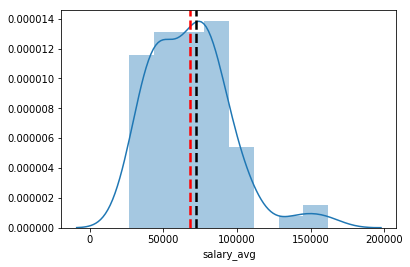

In [8]:
median=df['salary_avg'].median()
mean=df['salary_avg'].mean()
df_t=df[~df["salary_avg"].isnull()]

#print("total number of rows with salary info:{}".format(df_t.shape[0]))
ax=sns.distplot(df_t["salary_avg"])
ax.axvline(median, lw=2.5, ls='dashed', color='black')
ax.axvline(mean, lw=2.5, ls='dashed', color='red')
plt.show()

From distplot, we can tell teh data is in left-skewed distribution (median>mean)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


0.0    47
1.0    30
Name: salary_gt_med, dtype: int64


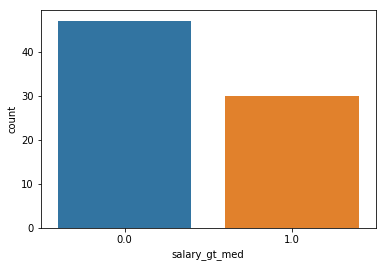

In [9]:
### creating new column if avg greater then median, then 1

df['salary_gt_med']=np.nan
df.ix[df["salary_avg"] > df["salary_avg"].median(), "salary_gt_med"] = 1
df.ix[df["salary_avg"] <= df["salary_avg"].median(), "salary_gt_med"] = 0
print(df["salary_gt_med"].value_counts())
sns.countplot(df["salary_gt_med"])

In [10]:
###Drop those rows with no salary information

salary_analysis=df[df.salary_gt_med.notnull()]
salary_analysis.shape
### dropping job_id 

###splitting X and y variables

salary_x=salary_analysis[['job_title','job_company','location','job_type','job_desc','skill']]
salary_y=pd.DataFrame(salary_analysis["salary_gt_med"])
salary_x.reset_index(drop=True, inplace=True)
salary_y.reset_index(drop=True, inplace=True)

#### Feature analysis

i. Examine job title feature

In [11]:
#### Using count vectorizer to examine job title from train data

from sklearn.feature_extraction.text import CountVectorizer
cvz = CountVectorizer(stop_words='english',ngram_range=(1, 2))
cvz.fit(salary_x['job_title'])

title_train = pd.DataFrame(cvz.transform(salary_x["job_title"]).todense(),
                       columns=cvz.get_feature_names())

title=pd.concat([title_train,salary_y],axis=1)
title.head()

,188072,3000,3500,3500 4200,4200,4200 mon,acquisitions,administrator,administrator consulting,ai,...,transportation analyst,utility,utility monitoring,vista,vista 3000,vp,vp enterprise,warehouse,west,salary_gt_med
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


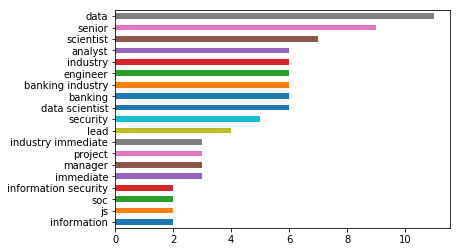

In [12]:
#### print top10 common title for salary_gt_median
title_freq=title[title["salary_gt_med"]==1.0].sum(axis=0)
#title_freq.sort_values(ascending = False)
title_freq.sort_values(ascending = False).iloc[1:20].sort_values().plot(kind='barh')
#plt.title('most common word in job title for above median jobs')
#plt.show()

job title terms like senior, scientist, banking, engineer are the most common words.  

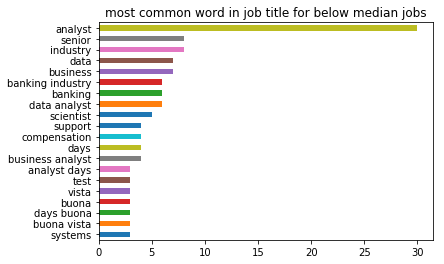

In [13]:
title_freq=title[title["salary_gt_med"]==0.0].sum(axis=0)
title_freq.sort_values(ascending = False).head(20).sort_values().plot(kind='barh')
plt.title('most common word in job title for below median jobs')
plt.show()

job title term like analyst appears the most frequenty in below-median jobs

iii. Examine location feature

In [14]:
salary_analysis.location.value_counts()

Singapore                    66
Buona Vista                   3
Tuas                          2
Outram                        1
Queenstown                    1
Bukit Merah                   1
West Singapore                1
Central Business District     1
Woodlands                     1
Name: location, dtype: int64

Based on result above, >90% jobs are Singapore, decided not to include location to predict salary

iv. Examine company name feature

In [15]:
salary_analysis.groupby(['job_company','salary_gt_med']).size()

job_company                                    salary_gt_med
A Very Normal Company Pte Ltd                  0.0              1
APBA Pte Ltd                                   0.0              1
Aim Recruit Pte Ltd                            0.0              1
Ancient Greenfields Pte Ltd                    0.0              1
BGC Group                                      0.0              1
BGC Group Pte Ltd                              1.0              1
Bladestone ONE                                 1.0              1
Capita Pte Ltd                                 0.0              1
                                               1.0              1
Career Connex Pte Ltd                          0.0              1
Chris Consulting Pte Ltd                       1.0              1
City HR Group                                  0.0              1
ClearSK Healthcare Pte Ltd                     0.0              1
Concord International Hospital                 0.0              1
Davy Omega (SEA

From the result above, company name doesn't seem like a good predictor 

iiv. Examine job_type feature

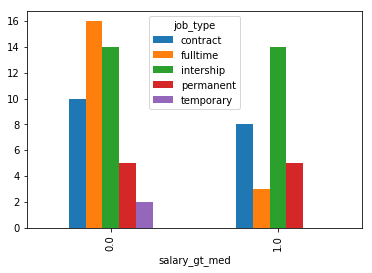

In [16]:
salary_analysis.groupby(['salary_gt_med','job_type']).size().unstack().plot(kind='bar')

From the bar graph, temporary job type can be categorized as below median salary, while the rest of job types are categorized as above median salary

vi. Examine skill feature

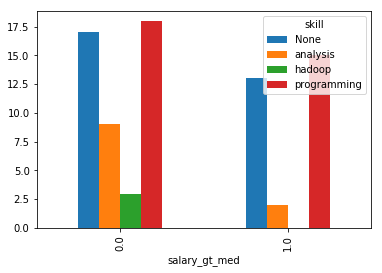

In [17]:
salary_analysis.groupby(['salary_gt_med','skill']).size().unstack().plot(kind='bar')

#### Modeling

In [18]:
salary_x=salary_analysis[["job_title","job_type","skill"]].copy() ## based on feature analysis above, decided only to include these two features for modeling
salary_y=salary_y.values.ravel()

#salary_x["good_job_title"] = salary_x["job_title"].apply(lambda x: 1 if x in (["senior", "scientist", "banking", "engineer"]) else 0)
#salary_x["bad_job_title"]= salary_x["job_title"].apply(lambda x: 1 if x in(["bussiness","analyst"]) else 0)

salary_x["good_job_title"] = 0
salary_x.loc[(salary_x["job_title"].str.contains("senior") | 
             salary_x["job_title"].str.contains("scientist")|
             salary_x["job_title"].str.contains("banking")|
             salary_x["job_title"].str.contains("engineer")) ,"good_job_title"] = 1

salary_x["bad_job_title"] = 0
salary_x.loc[(salary_x["job_title"].str.contains("analyst") | 
            salary_x["job_title"].str.contains("bussiness")) ,"bad_job_title"] = 1


salary_x["good_skills"] =salary_x["skill"].apply(lambda x: 1 if x in ['analysis'] else 0)
salary_x["bad_skills"] =salary_x["skill"].apply(lambda x: 1 if x not in ['analysis'] else 0)

salary_x["bad_job_type"] =salary_x["job_type"].apply(lambda x: 1 if x=='temporary' else 0)
salary_x["good_job_type"] =salary_x["job_type"].apply(lambda x: 1 if x!='temporary' else 0)

salary_x.drop(["job_title","job_type","skill"],axis=1,inplace=True)
salary_x=salary_x.astype('float')
#salary_x["bad_job_type"].value_counts()

In [19]:
### train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(salary_x, salary_y, test_size=0.3, stratify=salary_y, random_state=10)

#### Model 1: Logistic Regression

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Score for train set:", logreg.score(X_train, y_train))    
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-validated scores for train set:", scores)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(logreg.predict(X_test))  
probs = pd.DataFrame(logreg.predict_proba(X_test))
print("Score for test set:", logreg.score(X_test, y_test))
print(confusion_matrix(y_test,predicted))

print(classification_report(y_test, predicted))
logreg_accuracy=metrics.accuracy_score(y_test, predicted) 
logreg_precision= metrics.precision_score(y_test, predicted,probs[1]) 
logreg_recall= metrics.recall_score(y_test, predicted,probs[1] ) 
logreg_f1= metrics.f1_score(y_test, predicted,probs[1])

Score for train set: 0.7924528301886793
Cross-validated scores for train set: [0.91666667 0.81818182 0.6        0.8        0.8       ]
Score for test set: 0.5833333333333334
[[12  3]
 [ 7  2]]
             precision    recall  f1-score   support

        0.0       0.63      0.80      0.71        15
        1.0       0.40      0.22      0.29         9

avg / total       0.54      0.58      0.55        24



The logistic model score quite well for train set, 79% accurate with a range between 60% to 92% <br>
For the test set, the logistic model score quite well, 58% accurate. <br>
For the confusion matrix, 7 (33%) below median job salary were incorrectly predicted as above median job, whereas 2 (40%) above median job salary were incorrectly predicted as below median job. <br> Therefore, the model performs well for jobs with below median job salary as compared to above median job salary. 





### Model 2: Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()  

rfm = rf.fit(X_train, y_train)  
print("Score for train set:", rfm.score(X_train, y_train))

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rfm.predict(X_test))  
probs = pd.DataFrame(rfm.predict_proba(X_test))

# Store metrics
rf_accuracy = accuracy_score(y_test, predicted)  
print("accuray score for test set:",rf_accuracy)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))


Score for train set: 0.8113207547169812
accuray score for test set: 0.5833333333333334
[[12  3]
 [ 7  2]]
             precision    recall  f1-score   support

        0.0       0.63      0.80      0.71        15
        1.0       0.40      0.22      0.29         9

avg / total       0.54      0.58      0.55        24



/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


AUC for test set: 0.6185185185185185


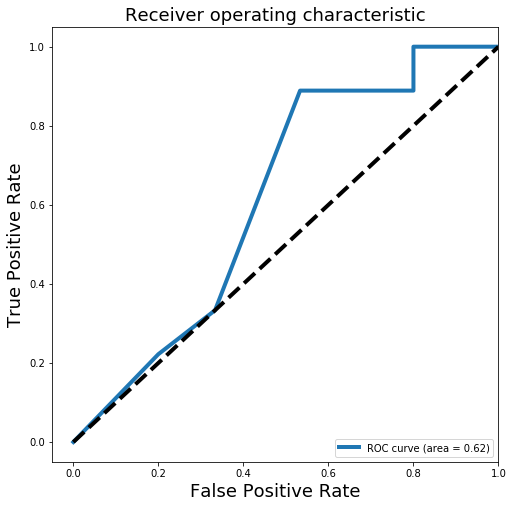

In [22]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs[1])
roc_auc = metrics.auc(fpr, tpr)
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
print("AUC for test set:",rf_roc_auc)

rf_precision= metrics.precision_score(y_test, predicted,probs[1]) 
rf_recall= metrics.recall_score(y_test, predicted,probs[1] ) 
rf_f1= metrics.f1_score(y_test, predicted,probs[1])

# Plot of a ROC curve for class 1 (has_cancer).
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

good_job_title = 0.6544723078673733
bad_job_title = 0.27599892702258433
good_skills = 0.016498934748033777
bad_skills = 0.021476390799005676
bad_job_type = 0.017396423296474905
good_job_type = 0.014157016266527983


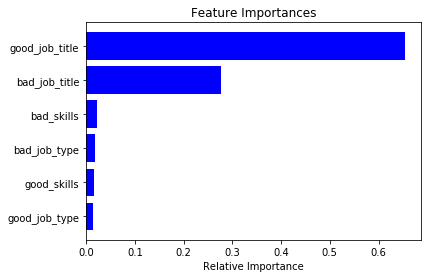

In [23]:
##feature_importances
for name, importance in zip(list(X_train.columns), rfm.feature_importances_):
    print(name, "=", importance)

features=list(X_train.columns)
importances = rfm.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

good job title (such as: senior, scientist, banking, engineer ) is an important feature to predict salary

#### Model 3: Decision Tree

Score for train set: 0.8113207547169812
accuray score for test set: 0.5833333333333334
[[12  3]
 [ 7  2]]
             precision    recall  f1-score   support

        0.0       0.63      0.80      0.71        15
        1.0       0.40      0.22      0.29         9

avg / total       0.54      0.58      0.55        24



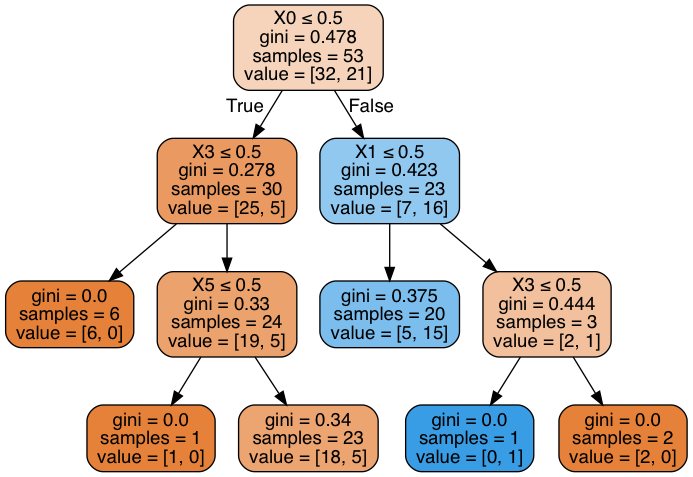

In [24]:
from sklearn import tree  
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

tree_model = tree.DecisionTreeClassifier(max_depth=3)  
# Fit a decision tree
tree_model = tree_model.fit(X_train, y_train)  
print("Score for train set:",tree_model.score(X_train, y_train) )
predicted = pd.DataFrame(tree_model.predict(X_test))  
probs = pd.DataFrame(tree_model.predict_proba(X_test))  
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1]) 
tree_accuracy = accuracy_score(y_test, predicted)
print("accuray score for test set:",tree_accuracy)
print(metrics.confusion_matrix(y_test, predicted) ) 
print(metrics.classification_report(y_test, predicted)) 

tree_precision= metrics.precision_score(y_test, predicted,probs[1]) 
tree_recall= metrics.recall_score(y_test, predicted,probs[1] ) 
tree_f1= metrics.f1_score(y_test, predicted,probs[1])
# output decision plot
dot_data = StringIO() 
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

#### Model 4: SVM

In [25]:
from sklearn.svm import SVC  
svm_model = SVC(probability=True)  
svm = svm_model.fit(X_train, y_train)  
print("Score for train set:",svm.score(X_train, y_train))
predicted = pd.DataFrame(svm_model.predict(X_test))  
probs = pd.DataFrame(svm_model.predict_proba(X_test))
svm_accuracy = metrics.accuracy_score(y_test, predicted)  
print("auc_score:",metrics.roc_auc_score(y_test, probs[1]))
print("accuray score for test set:",svm_accuracy)
print(metrics.confusion_matrix(y_test, predicted) ) 
print(metrics.classification_report(y_test, predicted)) 
svm_precision = metrics.precision_score(y_test, predicted,probs[1])  
svm_recall = metrics.recall_score(y_test, predicted,probs[1] )  
svm_f1 = metrics.f1_score(y_test, predicted,probs[1]  )


Score for train set: 0.7735849056603774
auc_score: 0.6481481481481481
accuray score for test set: 0.5416666666666666
[[10  5]
 [ 6  3]]
             precision    recall  f1-score   support

        0.0       0.62      0.67      0.65        15
        1.0       0.38      0.33      0.35         9

avg / total       0.53      0.54      0.54        24



#### Comparison of different results


In [26]:
# Model comparison
models = pd.DataFrame({  
  'Model': ['Logistic','random_forest','Decision_Tree', 'SVM'],
  'Accuracy' : [logreg_accuracy,rf_accuracy, tree_accuracy,  svm_accuracy],
  'Precision': [logreg_precision, rf_precision, tree_precision, svm_precision],
  'recall' : [logreg_recall, rf_recall,tree_recall,  svm_recall],
  'F1' : [logreg_f1, rf_f1,tree_f1, svm_f1],
})

models.set_index('Model', inplace=True)
models.sort_values(by='Accuracy',ascending=False)

,Accuracy,F1,Precision,recall
Model,,,,
Logistic,0.583333,0.285714,0.400,0.222222
random_forest,0.583333,0.285714,0.400,0.222222
Decision_Tree,0.583333,0.285714,0.400,0.222222
SVM,0.541667,0.352941,0.375,0.333333


From the result, it is clear that logistic, random_forest and decision tree models giving same scores on accuracy, F1 score, precision, and recall metric. 

#### Applyiing Decision Tree model to predict salary of job posting with no salary information

In [27]:
job_nsalary = df[df.salary_gt_med.isnull()].copy()
job_nsalary.shape

(1355, 18)

In [28]:
nsalary_x=job_nsalary[["job_title","job_type","skill"]].copy()
nsalary_x["good_job_title"] = 0
nsalary_x.loc[(nsalary_x["job_title"].str.contains("senior") | 
             nsalary_x["job_title"].str.contains("scientist")|
             nsalary_x["job_title"].str.contains("banking")|
             nsalary_x["job_title"].str.contains("engineer")) ,"good_job_title"] = 1

nsalary_x["bad_job_title"] = 0
nsalary_x.loc[(nsalary_x["job_title"].str.contains("analyst") | 
            nsalary_x["job_title"].str.contains("bussiness")) ,"bad_job_title"] = 1


nsalary_x["good_skills"] =nsalary_x["skill"].apply(lambda x: 1 if x in ['analysis'] else 0)
nsalary_x["bad_skills"] =nsalary_x["skill"].apply(lambda x: 1 if x not in ['analysis'] else 0)

nsalary_x["bad_job_type"] =nsalary_x["job_type"].apply(lambda x: 1 if x=='temporary' else 0)
nsalary_x["good_job_type"] =nsalary_x["job_type"].apply(lambda x: 1 if x!='temporary' else 0)

nsalary_x.head()
nsalary_x.drop(["job_title","job_type","skill"],axis=1,inplace=True)
nsalary_x=nsalary_x.astype('float')

In [29]:
nsalary_x.shape

(1355, 6)

In [30]:
predict_y_nsalary = tree_model.predict(nsalary_x)  
job_nsalary["salary_prediction"] = predict_y_nsalary
job_nsalary.head()

,Unnamed: 0,job_id,job_title,job_company,location,salaries,job_type,summary,job_link,job_desc,skill,programming,analysis,hadoop,database,period,salary_avg,salary_gt_med,salary_prediction
0,19,jl_acfda7b4da84a59d,Data analyst – automation enablement,UBS,Singapore,NaN,fulltime,Integrate data from various data sources to pr...,https://www.indeed.com.sg/rc/clk?jk=acfda7b4da...,Data Analyst – Automation Enablement - Singapo...,analysis,None,tableau,None,None,month,NaN,NaN,0.0
1,21,jl_b767c888c82bafdc,Analyst- data processing,J.D. Power,Singapore,NaN,fulltime,Data Processing team provides services such as...,https://www.indeed.com.sg/company/J.D.-Power/j...,Analyst- Data Processing - Singapore - Indeed....,analysis,None,spss,None,None,month,NaN,NaN,0.0
2,25,jl_303f44761404a23c,Advanced data analyst,Boehringer Ingelheim,Singapore,NaN,fulltime,"Data modelling, data cleansing, handling schem...",https://www.indeed.com.sg/rc/clk?jk=303f447614...,Advanced Data Analyst - Singapore - Indeed.com...,programming,java_r,None,None,None,month,NaN,NaN,0.0
3,27,jl_8409fff609317cd8,Marketing analyst,UPS,Singapore,NaN,fulltime,We are looking for a Marketing Analyst to supp...,https://www.indeed.com.sg/rc/clk?jk=8409fff609...,Marketing Analyst - Singapore - Indeed.com.sg ...,analysis,None,excel,None,None,month,NaN,NaN,0.0
4,28,jl_c555b86ad10769b4,Data analyst (data integrity),JLL,Singapore,NaN,fulltime,We are looking for a Data Analyst (Data Integr...,https://www.indeed.com.sg/rc/clk?jk=c555b86ad1...,Data Analyst (Data Integrity) - Singapore - In...,analysis,None,tableau,None,None,month,NaN,NaN,0.0


0.0    80.811808
1.0    19.188192
Name: salary_prediction, dtype: float64

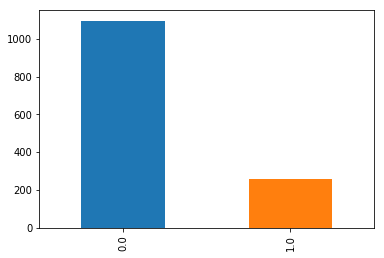

In [31]:
job_nsalary.salary_prediction.value_counts().plot(kind='bar')

job_nsalary.salary_prediction.value_counts()/len(job_nsalary)*100

Total 1355 job postings without salary information: <br>
80% of jobs were predicted to have salary below median whereas only 19.1% were prediccted to be above median after with decision tree model

## Q2: Determine the factors that distinguish job categories and titles from each other

In [32]:
df_q2=df[['job_title','job_desc']]

In [33]:
df_q2.head(2)

,job_title,job_desc
0,Data analyst – automation enablement,Data Analyst – Automation Enablement - Singapo...
1,Analyst- data processing,Analyst- Data Processing - Singapore - Indeed....


##### categorized job title into 3 category: scientist, analyst and others

In [34]:
df_cat=df_q2.copy()
df_cat['job_title']=df_cat['job_title'].map(lambda x:x.lower())
df_cat.head()
df_cat["category"] = 0
df_cat.loc[(df_cat["job_title"].str.contains("scientist")),"category"] = 1
df_cat.loc[(df_cat["job_title"].str.contains("analyst")),"category"] = 2

In [35]:
df_cat.head()

,job_title,job_desc,category
0,data analyst – automation enablement,Data Analyst – Automation Enablement - Singapo...,2
1,analyst- data processing,Analyst- Data Processing - Singapore - Indeed....,2
2,advanced data analyst,Advanced Data Analyst - Singapore - Indeed.com...,2
3,marketing analyst,Marketing Analyst - Singapore - Indeed.com.sg ...,2
4,data analyst (data integrity),Data Analyst (Data Integrity) - Singapore - In...,2


In [36]:
df_cat.category.value_counts()

2    809
0    445
1    178
Name: category, dtype: int64

0: others
1: scientist
2: analyst

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

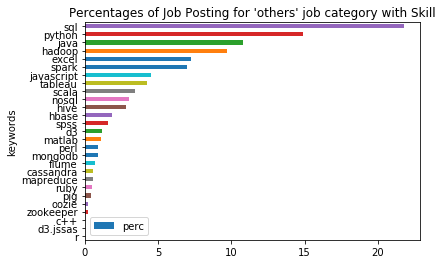

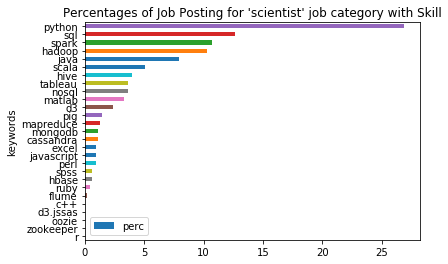

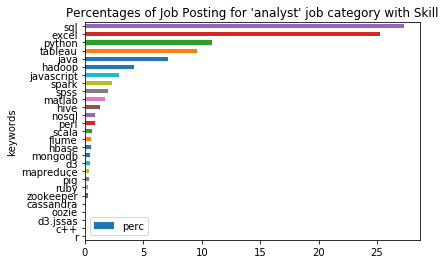

In [38]:
vocab= ['r','python','java','c++','ruby','perl','matlab','javascript','scala','excel','tableau','d3.js''sas','spss','d3','hadoop','mapreduce','spark','pig','hive','oozie','zookeeper','flume','sql','nosql','hbase','cassandra','mongodb'] 
def get_freq_words(sparse_counts, columns):
    word_counts = np.asarray(X_all.sum(axis=0)).reshape(-1)

    largest_count_indices = word_counts.argsort()[::-1]

    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words
dic={0:'others',
     1:'scientist',
     2:'analyst'}
for i in range(3):
    df_test=df_cat[df_cat['category']==i].copy()
    cvt      =  CountVectorizer(vocabulary = vocab)
    X_all    =  cvt.fit_transform(df_test['job_desc'])
    columns  =  np.array(cvt.get_feature_names()) 
    freq_words = get_freq_words(X_all, columns)
    freq_words=freq_words.to_frame().reset_index()
    freq_words.columns=['keywords','freq']
    freq_words['perc']= (freq_words['freq']/freq_words['freq'].sum())*100
    freq_words.sort_values(by='perc',ascending=True).plot(x='keywords', y='perc', kind='barh') 
    plt.title('Percentages of Job Posting for \'{}\' job category with Skill'.format(dic[i]))
    plt.show()

Looking at plot above, most common requested skills for job type below are: <br>
i. Others job: sql, python, java <br>
ii. Scientist: sql, python, spark, hadoop <br>
iii. Analyst: sql, excel, python, tableau <br>


#### split the dataset to train and test

In [39]:
### train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cat['job_desc'], df_cat['category'], test_size=0.3, stratify= df_cat['category'], random_state=10)

In [40]:
### model baseline
(y_train.value_counts() / len(y_train)).mean()

0.3333333333333333

#### Modeling with Logistic Regression

In [41]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

cvt = CountVectorizer(vocabulary = vocab)
pipeline = Pipeline([
    ('vect', cvt),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression())
]) 
pipeline.fit(X_train,y_train)
predicted = pipeline.predict(X_test)
logreg_score=pipeline.score(X_test, y_test)
logreg_score

0.5906976744186047

In [42]:
print(classification_report(y_test, predicted))
#0: others, 1: data scientist, 2: data analyst

             precision    recall  f1-score   support

          0       0.40      0.13      0.19       134
          1       0.38      0.26      0.31        53
          2       0.64      0.92      0.75       243

avg / total       0.53      0.59      0.52       430



There are total 809 analysts, whereas only 178 data scientist jobs. Therefore, the dataset is imbalanced, therefore, it is not recommended to look at F1 or precision score. 
By looking at the ROC curve below, the plot is greater than 0.5. The model performs better than baseline model.

ROC curve for data scientist


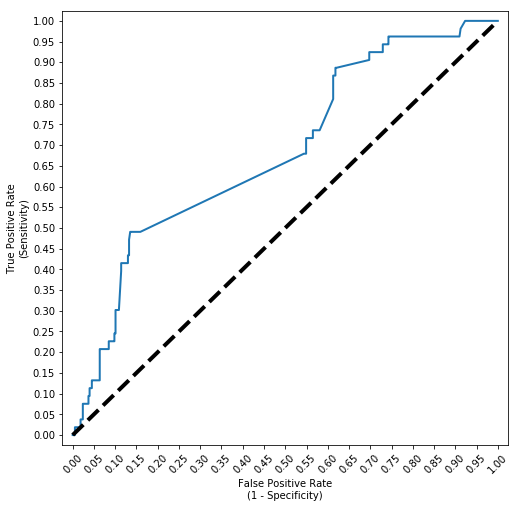

ROC curve for data analyst


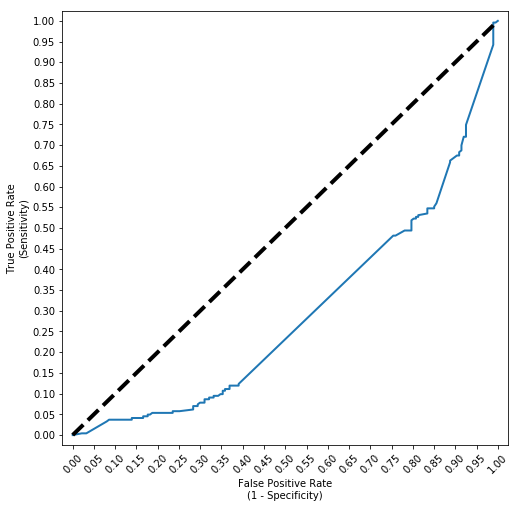

In [43]:
from sklearn.metrics import roc_curve

def plot_roc(y, probs, threshmarkers=None):
    fpr, tpr, thresh = roc_curve(y, probs)

    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, lw=2)
    plt.xlabel("False Positive Rate\n(1 - Specificity)")
    plt.ylabel("True Positive Rate\n(Sensitivity)")
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xticks(np.linspace(0, 1, 21), rotation=45)
    plt.yticks(np.linspace(0, 1, 21))
    plt.show()
    
predicted_proba = pipeline.predict_proba(X_test)
print('ROC curve for data scientist')
plot_roc(y_test.apply(lambda x: x == 1), predicted_proba[:, list(pipeline.classes_).index(0)])
print('ROC curve for data analyst')
plot_roc(y_test.apply(lambda x: x == 2), predicted_proba[:, list(pipeline.classes_).index(1)])

ii. Modeling with MultinomialNB

In [44]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

cvt = CountVectorizer(vocabulary = vocab)
pipeline = Pipeline([
    ('vect', cvt),
    ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
]) 
pipeline.fit(X_train,y_train)
predicted = pipeline.predict(X_test)
mln_score=pipeline.score(X_test, y_test)
mln_score

0.5930232558139535

In [45]:
print(classification_report(y_test, predicted))
#0: others, 1: data scientist, 2: data analyst

             precision    recall  f1-score   support

          0       0.36      0.16      0.23       134
          1       0.33      0.06      0.10        53
          2       0.64      0.95      0.76       243

avg / total       0.51      0.59      0.51       430



iii. Modeling with RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

cvt = CountVectorizer(vocabulary = vocab)
pipeline = Pipeline([
    ('vect', cvt),
    ('tfidf', TfidfTransformer()),
    ('cls', RandomForestClassifier(n_estimators=30))
]) 
pipeline.fit(X_train,y_train)
predicted = pipeline.predict(X_test)
rfc_score=pipeline.score(X_test, y_test)
rfc_score

0.5953488372093023

In [47]:
print(classification_report(y_test, predicted))
#0: others, 1: data scientist, 2: data analyst

             precision    recall  f1-score   support

          0       0.48      0.15      0.23       134
          1       0.37      0.36      0.37        53
          2       0.64      0.89      0.75       243

avg / total       0.56      0.60      0.54       430



#### Comparison of different result

In [48]:
# Model comparison
models = pd.DataFrame({  
  'Model': ['Logistic','Multinomial','randomForest'],
  'Score' : [logreg_score,mln_score,rfc_score,]
})

models.set_index('Model', inplace=True)
models.sort_values(by='Score',ascending=False)

,Score
Model,
randomForest,0.595349
Multinomial,0.593023
Logistic,0.590698
